# Week 4

In this lab session we will see explore in more detail the following:
- Logistic Regression

# Logistic Regression

The output for linear regression is a number that has its real meaning. Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.

In [50]:
# These packages used throughout, run me first!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

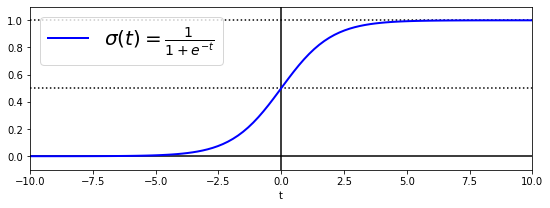

In [51]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

The output for a logistic regression is a number that represents the probability of the event happening. Logistic regression is to transform the output of a linear regression which has a wider range, to a range that probability lies in [0,1]. The transformation formula is logit that maps a value to a number in the range of [0,1].

Now we will load the **Iris plants dataset** and explore the implementation on a real dataset.

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [53]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [54]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

Decision boundary helps to differentiate probabilities into positive class and negative class.  

**Linear Decision Boundary**
![Decision Boundary](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/db_linear.jpeg)

**Non Linear Decision Boundary**
![Decision Boundary](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/db_non_linear.jpeg)
https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102


c:\Users\liamd\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


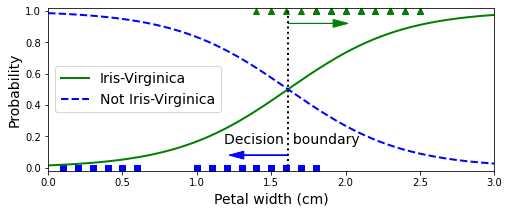

In [63]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [57]:
decision_boundary

array([1.61561562])

In [64]:
log_reg.predict([[1.7], [1.5]])
#Above graph shows that petal length >1.5 is likely Iris Virginica (right side)
# and petal length <=1.5 is likely not Iris Virginica
#so running predict with lengths 1.7. and 1.5 will return 1, 0 (as below)

array([1, 0])

## Task 1

Plot a figure similar to the one above, on the predicted probability of "Iris-Virginica" and raw data points based on "sepal length" (instead of "petal width").

c:\Users\liamd\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


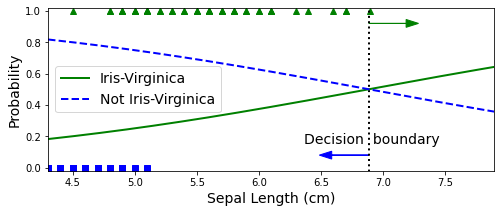

In [72]:
# Your code here: 
#pull out 'sepal lenght' from the iris dataset
sepal = iris["data"][:, :1]
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
sepal_log_reg = LogisticRegression(solver="liblinear", random_state=42)
sepal_log_reg.fit(sepal, y)

#we know from summary stats that min length is 4.3 and max is 7.9 so we have X axis within those bounds
X_new = np.linspace(4.3, 7.9, 1000).reshape(-1, 1)
y_proba = sepal_log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([4.3, 7.9, -0.02, 1.02])
plt.show()

Explore the implementation on Iris dataset using *petal length* and *petal width* as input features

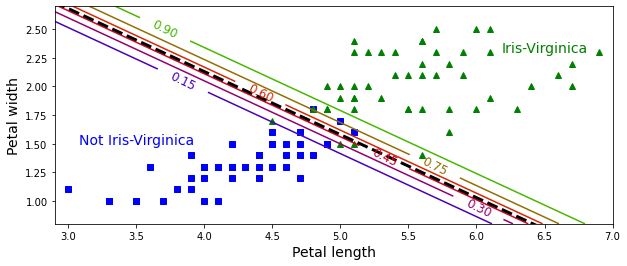

In [66]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int) #again evaluating likelihood of being Iris Virginica

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [71]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

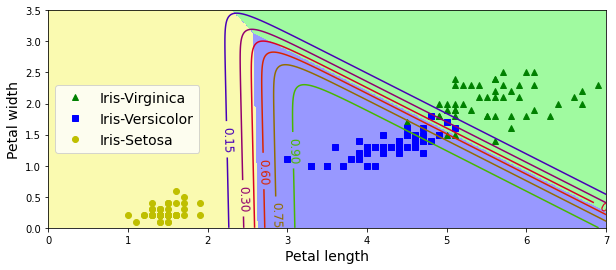

In [68]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [81]:
softmax_reg.predict([[5, 2]]) #passing in value of 5,2 (petal length=5, petal width = 2), outputs 2 (iris virginica) per the picture above

array([2])

In [82]:
softmax_reg.predict_proba([[5, 2]]) #takes same input as above cell, returns probability of this input belonging to the different target classes
#for this input, there is a 94.2% (9.42506362e-01 in below array) chance that this input is class Iris Virginicy


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Task 2

The code above uses all the data points for training. Create your own training, validation, and test datasets from the Iris dataset. Report and compare the training, validation, and test performance of logistic regression models with different subsets of features using suitable metrics. 

In [ ]:
# Your code here: 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load iris dataset
iris = load_iris()

# Split the dataset into training (60%), validation (20%), and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# Create and train the second multinomial logistic regression model with only the first two features (sepal length and sepal width)
log_reg2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg2.fit(X_train[:, :2], y_train)

# Evaluate the second model on the validation set
val_preds2 = log_reg2.predict(X_val[:, :2])
val_acc2 = accuracy_score(y_val, val_preds2)
val_report2 = classification_report(y_val, val_preds2)
print("Model 2 validation accuracy:", val_acc2)
print("Model 2 validation report:")
print(val_report2)

# Evaluate the second model on the test set
test_preds2 = log_reg2.predict(X_test[:, :2])
test_acc2 = accuracy_score(y_test, test_preds2)
test_report2 = classification_report(y_test, test_preds2)
print("Model 2 test accuracy:", test_acc2)
print("Model 2 test report:")
print(test_report2)
print(log_reg2.predict_proba([[5,2]]))

In [1]:
# import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# load the iris dataset
iris = load_iris()

# define the feature subsets to use
feature_subsets = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [0, 1, 2, 3]]

# loop over the feature subsets and fit a logistic regression model for each one
for subset in feature_subsets:
    X = iris.data[:, subset]
    y = iris.target

    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # fit a logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Features: {subset}, Training accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

    # fit the model on the entire training set and test on the test set
    model.fit(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f'Test accuracy: {test_acc:.3f}')

NameError: name 'np' is not defined